# SYDE 671, A0, Questions
## Tongdan Su, 20754736


In [2]:
from matplotlib.pyplot import imread, imshow
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
img = imread("./bird.bmp")

Q1. Explicitly describe image convolution: the input, the transformation, and the output. Why is it useful for computer vision?
A1. Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. This is related to a form of mathematical convolution. The matrix operation being performed-convolution-is not traditional matrix multiplication. Each convolution operation has a kernel which could be a any matrix smaller than the original image in height and width. 

The values of a given pixel in the output image are calculated by multiplying each kernel value by the corresponding input image pixel values. If the kernel is symmetric then place the center (origin) of the kernel on the current pixel. The kernel will overlap the neighboring pixels around the origin. Each kernel element should be multiplied with the pixel value it overlaps with and all of the obtained values should be summed. This resultant sum will be the new value for the current pixel currently overlapped with the center of the kernel.

If the kernel is not symmetric, it has to be flipped both around its horizontal and vertical axis before calculating the convolution.

In math, convolution is essentially the blending of two functions into a third function. In the context of image processing, convolution is kind of like transforming image pixels in a structured way, taking nearby pixels into account.

Convolution allowed computer vision to scale from simple applications to powering sophisticated products and services, ranging from face detection in the photo gallery to making better medical diagnoses. They might be the key method in computer vision going forward, or some other new breakthrough might just be around the corner. 

Q2. What is the difference between convolution and correlation? Construct a scenario which produces a different output between both operations.
A2. Linear filtering of an image is accomplished through an operation called convolution. Convolution is a neighborhood operation in which each output pixel is the weighted sum of neighboring input pixels. The matrix of weights is called the convolution kernel, also known as the filter. A convolution kernel is a correlation kernel that has been rotated 180 degrees.
The operation called correlation is closely related to convolution. In correlation, the value of an output pixel is also computed as a weighted sum of neighboring pixels. The difference is that the matrix of weights, in this case called the correlation kernel, is not rotated during the computation.

Theoretically, convolution are linear operations on the signal or signal modifiers, whereas correlation is a measure of similarity between two signals. The basic difference between convolution and correlation is that the convolution process rotates the matrix by 180 degrees. Most of the time the choice of using the convolution and correlation is up to the preference of the users, and it is identical when the kernel is symmetrical.

Also, correlation or auto-correlation is the measure of similarity of signal with itself which has a different time lag between them. Cross-correlation is a way of finding similarity between two different signals.


In [6]:
k = 1/9 * np.array([[7,7,7],[1,1,1],[3,3,3]])
convolve = np.zeros_like(img)
correlate = np.empty_like(img)

for i in range(3):
    convimg[:,:,channel_i] = ndimage.convolve(input=img[:,:,channel_i], weights=k)
    corrimg[:,:,channel_i] = ndimage.correlate(input=img[:,:,channel_i], weights=k)
np.sum(correlate-convolve)

56688928

Q3. What is the difference between a high pass filter and a low pass filter in how they are constructed, and what they do to the image? Please provide example kernels and output images.
A3.
High-Pass filter:
A high-pass filter can be used to make an image appear sharper. These filters emphasize fine details in the image – exactly the opposite of the low-pass filter. High-pass filtering works in exactly the same way as low-pass filtering; it just uses a different convolution kernel. 

High-pass filtering can also cause small, faint details to be greatly exaggerated. An over-processed image will look grainy and unnatural, and point sources will have dark donuts around them. So while high-pass filtering can often improve an image by sharpening detail, overdoing it can actually degrade the image quality significantly.

 Low-Pass filter:
The most basic of filtering operations is called "low-pass". A low-pass filter, also called a "blurring" or "smoothing" filter, averages out rapid changes in intensity. The simplest low-pass filter just calculates the average of a pixel and all of its eight immediate neighbors. The result replaces the original value of the pixel. The process is repeated for every pixel in the image.

Noise always changes rapidly from pixel to pixel because each pixel generates its own independent noise. The image from the telescope isn't "uncorrelated" in this fashion because real images are spread over many pixels. So the low-pass filter affects the noise more than it does the image. By suppressing the noise, gradual changes can be seen that were invisible before. Therefore a low-pass filter can sometimes be used to bring out faint details that were smothered by noise.


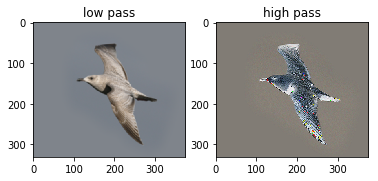

In [9]:
k_low = 1/9 * np.array([[1,1,1],[1,1,1],[1,1,1]])##Sum is 1
k_high = np.array([[1,-2,1],[-1,4,-1],[1,-2,1]])##Sum is 0
low_pass = np.zeros_like(img)
high_pass = np.zeros_like(img)
for i in range(3):
    low_pass[:,:,i] = ndimage.convolve(input=img[:,:,i], weights=k_low)
    high_pass[:,:,i] = ndimage.convolve(input=img[:,:,i], weights=k_high)

plt.subplot(1,2,1)
imshow(low_pass)
plt.title("low pass")
plt.subplot(1,2,2)
plt.title("high pass")
imshow(low_pass-high_pass)

Q4.How does computation time vary with filter sizes from 3×3 to 15×15(for all odd and square sizes), and with image sizes from 0.25 MPix to 8 MPix (choose your own intervals)? Measure both using scipy.ndimage.convolve or scipy.ndimage.correlate to produce a matrix of values. Use the skimage.transform module to vary the size of an image. Use an appropriate charting function to plot your matrix of results, such as Axes3D.scatter or Axes3D.plotsurface.Do the results match your expectation given the number of multiply and add operations in convolution? Image:RISDance.jpg (in the .tex directory).

A4.Convolution filter slides over all the pixels of the image taking their dot product. Most of the useful features in an image are usually local and it makes sense to take few local pixels at a time to apply convolutions. Using a small kernel instead of a fully connected network is to benefit from weight sharing and reduction in computational costs. 

For an odd-sized filter, all the previous layer pixels would be symmetricallly around the output pixel. Without this symmmetry, we will have to account for distortions across the layers which happens when using an even sized kernel. Therefore, even sized kernel filters are mostly skipped to promote implementation simplicity. If you think of convolution as an interpolation from the given pixels to a center pixel, we cannnot interpoltae to a center pixel using an even-sized filter.

Therefore, 3*3 convolution filters work in general, and is often the popular choice.


In [17]:
from scipy.ndimage import convolve
from matplotlib.pyplot import imread, imshow
import skimage
import numpy as np
from skimage.transform import rescale
import warnings
import time
import seaborn as sns
import pandas as pd
warnings.filterwarnings('ignore')
img4 = imread("./RISDance.jpg")
kernel_sizes = list(range(3,16,2))
image_scale = np.arange(1, 0, -0.1)
Time = []
for i, scale_i in enumerate(image_scale):
    img_scaled = rescale(img4, scale_i)
    for j, kernel_i in enumerate(kernel_sizes):
        kernel = np.ones((kernel_i, kernel_i, 3)) / k_i**2 / 3       
        start = time.time()
        img_convolved = convolve(img_scaled, kernel)
        end = time.time()
        t= end-start
        Time.append(t)

Text(0.5, 0, 'Time')

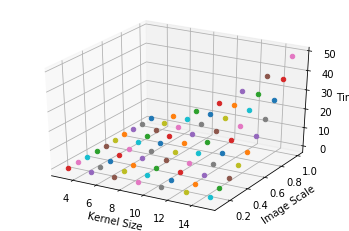

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ti=0
while ti<len(Time):
    for s in image_scale:
        for k in kernel_sizes:
            x=k
            y=s
            z=Time[ti]
            ti+=1
            ax.scatter(x, y, z)
ax.set_xlabel('Kernel Size')
ax.set_ylabel('Image Scale')
ax.set_zlabel('Time')

As shown above, no matter the image scale, the 3*3 kernel always took the least time.